In [26]:
import pandas as pd
import matplotlib.pylab as plt

In [27]:
airlines=pd.read_excel('EastWestAirlines (3).xlsx')
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [28]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [29]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [30]:
## Normalizing values
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [31]:
## we are disregarding the ID# column

airlines_n= norm_func(airlines.iloc[:,1:])
airlines_n
airlines_n.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dataframe above is normalized

In [32]:
## for creating Dendograms

from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [33]:
z=linkage(airlines_n,method='complete',metric='euclidean')

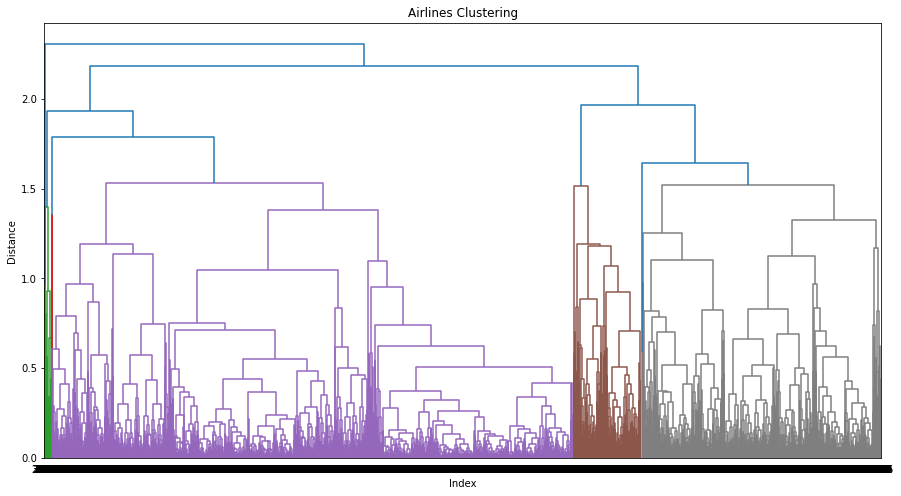

In [34]:
plt.figure(figsize=(15, 8));plt.title('Airlines Clustering');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering
import sklearn.cluster as skc

In [38]:
h_clust=AgglomerativeClustering(n_clusters=14,affinity="euclidean",linkage="complete").fit(airlines_n)
h_clust

AgglomerativeClustering(linkage='complete', n_clusters=14)

In [40]:
h=pd.Series(h_clust.labels_)
airlines['clust']=h
airlines1=airlines.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]
airlines1

,clust,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,5,1,28143,0,1,1,1,174,1,0,0,7000,0
1,5,2,19244,0,1,1,1,215,2,0,0,6968,0
2,5,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,5,4,14776,0,1,1,1,500,1,0,0,6952,0
4,1,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,2,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,2,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,2,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,6,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [41]:
airlines2= airlines1.iloc[:,2:].groupby(airlines1.clust).median()
airlines2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,53268.5,0.0,1.0,1.0,1.0,10122.0,13.0,0.0,0.0,6243.0,1.0
1,102373.0,0.0,5.0,1.0,1.0,62666.0,20.0,250.0,1.0,6184.0,1.0
2,39503.0,0.0,3.0,1.0,1.0,15178.0,14.0,0.0,0.0,3217.0,1.0
3,89165.5,0.0,4.0,1.0,1.0,28919.5,15.0,0.0,0.0,3576.5,0.0
4,122488.0,1099.0,1.0,1.0,1.0,12450.0,20.0,4620.0,16.0,3299.0,1.0
5,36654.5,0.0,1.0,1.0,1.0,2750.0,6.5,0.0,0.0,5603.5,0.0
6,20765.0,0.0,1.0,1.0,1.0,1000.0,3.0,0.0,0.0,1928.0,0.0
7,106673.0,250.0,2.5,1.0,1.0,76325.0,66.5,18075.0,49.5,1822.5,1.0
8,56231.0,591.0,1.5,1.0,4.0,80615.0,21.0,1150.0,4.5,6281.5,1.0


In [43]:
airlines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   clust              3999 non-null   int64
 1   ID#                3999 non-null   int64
 2   Balance            3999 non-null   int64
 3   Qual_miles         3999 non-null   int64
 4   cc1_miles          3999 non-null   int64
 5   cc2_miles          3999 non-null   int64
 6   cc3_miles          3999 non-null   int64
 7   Bonus_miles        3999 non-null   int64
 8   Bonus_trans        3999 non-null   int64
 9   Flight_miles_12mo  3999 non-null   int64
 10  Flight_trans_12    3999 non-null   int64
 11  Days_since_enroll  3999 non-null   int64
 12  Award?             3999 non-null   int64
dtypes: int64(13)
memory usage: 406.3 KB


In [44]:
airlines1['clust'].value_counts()

6     983
5     952
2     711
3     556
0     390
1     319
4      39
11     25
9       6
10      6
13      4
7       4
12      2
8       2
Name: clust, dtype: int64

After performing H-Clustering, we have identified a total of 14 clusters. The highest clusters being cluster 6, 5, 2 & 3 respectively.